**Automate Run**

Evaluate the model on test set range: 2024-07-15 to 2025-04-17.
plot_distribution is False, skipping plot.


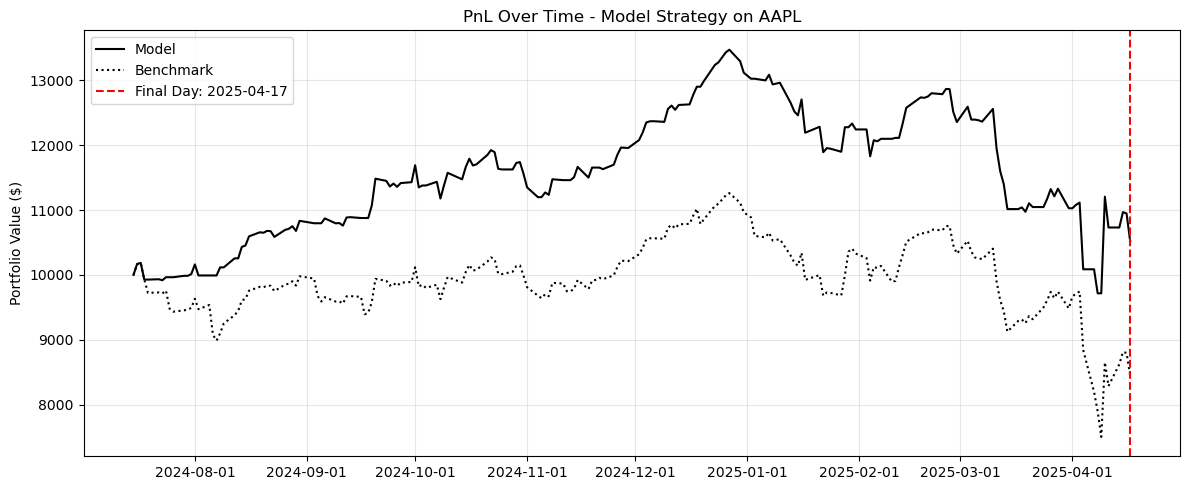

In [15]:
from ml_pipeline import SVMTradingPipeline
from run import run_full_backtest

params = {
    'ticker':'AAPL',
    'start':'2010-01-01',
    'end':'2025-04-22',
    'test_prop':0.05,
    'initial_capital':10000,
    'plot_path':'media/model_vs_benchmark_PnL.png',
    'runtime':'fast'
}

results = run_full_backtest(**params)

# Can pull pd.DataFrame -> df = results[0]

**Manual Run**

Evaluate the model on test set range: 2023-10-11 to 2025-04-24.
plot_distribution is False, skipping plot.


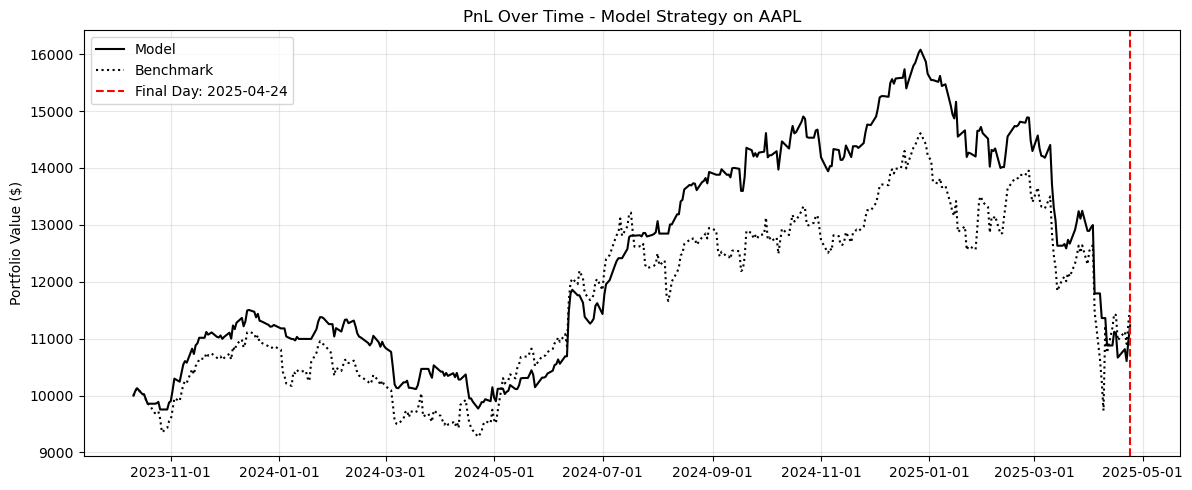

In [16]:
# Import .py
from ml_pipeline import SVMTradingPipeline

# Define pipeline params
pipeline = SVMTradingPipeline('AAPL',start_date='2010-01-01',end_date='2025-04-26',test_prop=0.10)

# Call functions!
data = pipeline.download_data                 ## raw data
engineered_data = pipeline.engineer_features  ## engineered features

svm_params_grid = {
    'kernel': ['rbf'], # typically best for financial data
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
}

splits = pipeline.split_data # {'Training':[X_tr,y_tr], 'Testing':[X_ts,y_ts]}

best_params = pipeline.cross_validate(svm_param_grid=svm_params_grid, n_splits=5) # Best parameters from grid_search_CV

y_predict = pipeline.fit_predict(param_grid = best_params, plot_distribution = False, save_path = None)

simulate_trade = pipeline.simulate_trading(initial_capital=10000, benchmark=True)

plot_pnl = pipeline.plot_pnl(simulate_trade, save_path='media/model_vs_benchmark_PnL.png')